In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df = pd.read_excel("region roles (26.05.22).xlsx")

In [4]:
df.head(5)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN
1,1,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
2,2,55116066,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
3,3,54031261,False,Ведущий Специалист по информационным технологиям,"{'id': 'pochta-4352-office', 'name': '«Почта Р...",False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN
4,4,55243040,False,Специалист по защите информации,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN


In [4]:
df['salary'][1]

"{'from': 25000, 'to': 50000, 'currency': 'RUR', 'gross': True}"

In [5]:
type(eval(df['salary'][1]))#eval()  converts string with a syntax of different obj into object itself(in this case - dictionary)

dict

In [6]:
df['salary'].fillna('{}').apply(eval).apply(type)
#IMPORTANT when used, .apply< method works on ALL the elements in the pd.series

0        <class 'dict'>
1        <class 'dict'>
2        <class 'dict'>
3        <class 'dict'>
4        <class 'dict'>
              ...      
69651    <class 'dict'>
69652    <class 'dict'>
69653    <class 'dict'>
69654    <class 'dict'>
69655    <class 'dict'>
Name: salary, Length: 69656, dtype: object

In [8]:
df['salary'].fillna('{}').apply(eval).apply(type).value_counts()

<class 'dict'>    69656
Name: salary, dtype: int64

In [10]:
def x_to_string(val):
    try: #literally, ask the func to try and apply certain func. if impossible-doesn't return error, but an exception
        return eval(val)
    except TypeError:
        return val #returns value if previous attempt(eval) didn't work
    

In [11]:
x_to_string(np.NaN)

nan

In [12]:
sal_dec_df = df['salary'].apply(x_to_string)#strings turned into dicts, Nan's are left as is

In [13]:
sal_dec_df.head(5)

0                                                  NaN
1    {'from': 25000, 'to': 50000, 'currency': 'RUR'...
2                                                  NaN
3    {'from': 26000, 'to': None, 'currency': 'RUR',...
4    {'from': 20000, 'to': 20000, 'currency': 'RUR'...
Name: salary, dtype: object

In [14]:
pd.Series(sal_dec_df[1]) #if put into pd.series - automatic decompostion of a dict

from        25000
to          50000
currency      RUR
gross        True
dtype: object

In [15]:
pd.Series(np.NaN)

0   NaN
dtype: float64

In [16]:
sal_dec_df = sal_dec_df.apply(pd.Series)#pd.series index starts with 0, therefore 0 column only has nans

In [17]:
sal_dec_df[0].isna().all()#all() needed to check EVERYTING

True

In [18]:
sal_dec_df.drop(0,axis=1,inplace=True)

In [19]:
sal_dec_df['gross'].fillna(True)#I'd rather fill it with True, since it's better not to lift expectation, but rather to lower them

0         True
1         True
2         True
3         True
4        False
         ...  
69651     True
69652    False
69653    False
69654    False
69655     True
Name: gross, Length: 69656, dtype: bool

In [20]:
gross_sal_multiplier = sal_dec_df['gross'].fillna(True).map({True: 0.87, False: 1}) 

In [21]:
sal_dec_df['from_net'] = sal_dec_df['from']*gross_sal_multiplier

In [22]:
sal_dec_df.insert(2,'to_net',sal_dec_df['to']*gross_sal_multiplier)

In [23]:
sal_dec_df

,from,to,to_net,currency,gross,from_net
0,NaN,NaN,NaN,NaN,NaN,NaN
1,25000.0,50000.0,43500.0,RUR,True,21750.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,26000.0,NaN,NaN,RUR,True,22620.0
4,20000.0,20000.0,20000.0,RUR,False,20000.0
...,...,...,...,...,...,...
69651,NaN,NaN,NaN,NaN,NaN,NaN
69652,130000.0,NaN,NaN,RUR,False,130000.0
69653,50000.0,NaN,NaN,RUR,False,50000.0
69654,85000.0,NaN,NaN,RUR,False,85000.0


In [24]:
sal = sal_dec_df[['from_net','to_net']].mean(axis=1)

In [25]:
sal_dec_df['currency'].value_counts()

RUR    37028
USD      472
EUR       88
KZT        2
Name: currency, dtype: int64

# assignment

1. Сделать конвертацию в рубли и построить гистограмму и боксплот-диаграмму 
2. Если распределение ненормальное, то попробовать выполнить преобразование, чтобы распределение стало похожим на нормальное (почитайте про логарифмирование)

3. Попробовать построить QQ-plot

usd_to_rub = 56.2996
eur_to_rub = 57.921
kzt_to_rub = 13.5040

step1) adding sal column (mean from from to to)

In [26]:
sal_dec_df['sal']=sal

In [27]:
sal_dec_df

,from,to,to_net,currency,gross,from_net,sal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25000.0,50000.0,43500.0,RUR,True,21750.0,32625.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26000.0,NaN,NaN,RUR,True,22620.0,22620.0
4,20000.0,20000.0,20000.0,RUR,False,20000.0,20000.0
...,...,...,...,...,...,...,...
69651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69652,130000.0,NaN,NaN,RUR,False,130000.0,130000.0
69653,50000.0,NaN,NaN,RUR,False,50000.0,50000.0
69654,85000.0,NaN,NaN,RUR,False,85000.0,85000.0


step2) a dict fo:

D:\Users\akhen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sal'>

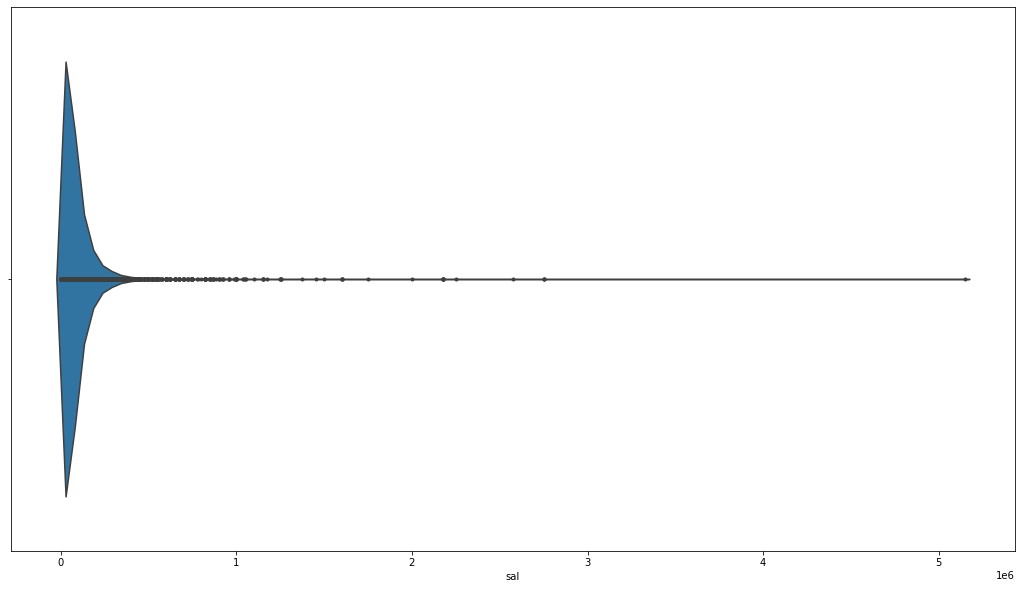

In [28]:
plt.figure(figsize=(18,10))
sns.violinplot(sal_dec_df['sal'],inner='point')

very long tale typically indicates the need to apply logarythm to normalize the data distribution

D:\Users\akhen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sal'>

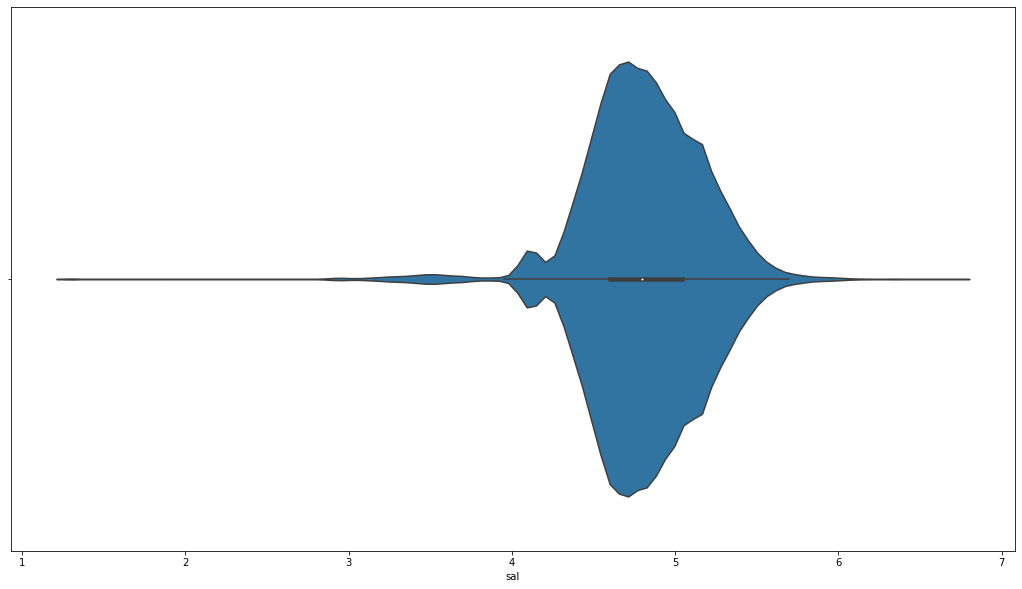

In [29]:
plt.figure(figsize=(18,10))
sns.violinplot(sal_dec_df['sal'].apply(np.log10))#10 meaning by what number we need to multiply to get the number (punish big number)

after applying np.log I can figure out the x axis: '4' = 10 000 RUB (ten needs to be multiplied by itsel 4 times to get 10 000), '6'  = 1 mln RUB

In [30]:
10*10*10*10*10*10

1000000

[1. 2. 3. 4. 5. 6. 7.]


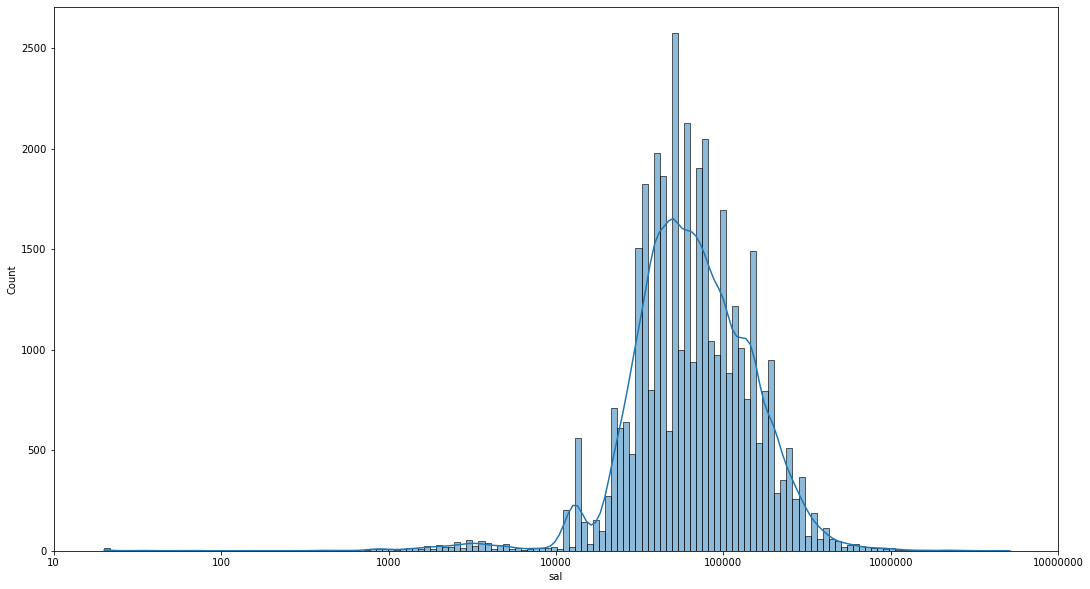

In [31]:
plt.figure(figsize=(18,10))
ax = sns.histplot(sal_dec_df['sal'].apply(np.log10),bins = 150,kde = True)
type(ax)
print(ax.get_xticks())
ax.set_xticks(ax.get_xticks(),np.power(10,ax.get_xticks()).astype(int))

In [32]:
salary  = sal_dec_df['sal']

In [33]:
(salary <=1500000) & (salary >=10000)

0        False
1         True
2        False
3         True
4         True
         ...  
69651    False
69652     True
69653     True
69654     True
69655    False
Name: sal, Length: 69656, dtype: bool

In [34]:
mask = (salary <=1500000) & (salary >=10000)

In [35]:
salary[mask]

1         32625.0
3         22620.0
4         20000.0
5         17500.0
7         23490.0
           ...   
69648    139200.0
69649    250000.0
69652    130000.0
69653     50000.0
69654     85000.0
Name: sal, Length: 36967, dtype: float64

In [36]:
salary = salary[mask]

[3.5 4.  4.5 5.  5.5 6.  6.5]


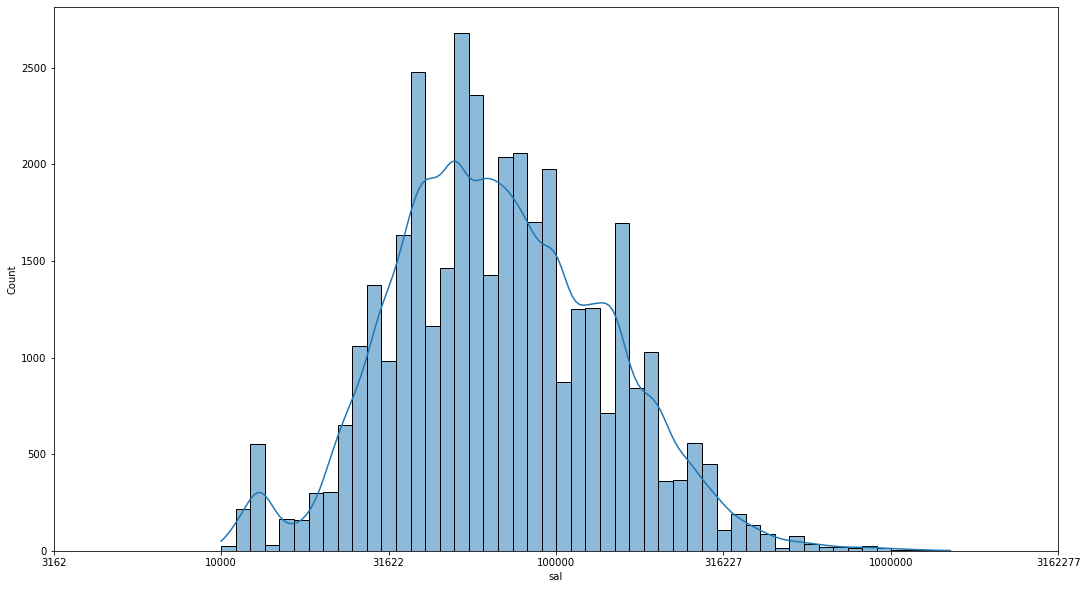

In [38]:
plt.figure(figsize=(18,10))
ax = sns.histplot(salary.apply(np.log10),bins = 50,kde = True)
type(ax)
print(ax.get_xticks())
ax.set_xticks(ax.get_xticks(),np.power(10,ax.get_xticks()).astype(int))

In [37]:
df.head(4)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN
1,1,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
2,2,55116066,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
3,3,54031261,False,Ведущий Специалист по информационным технологиям,"{'id': 'pochta-4352-office', 'name': '«Почта Р...",False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN


In [38]:
df.columns

Index(['Unnamed: 0', 'id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'area', 'salary', 'type', 'address',
       'response_url', 'sort_point_distance', 'published_at', 'created_at',
       'archived', 'insider_interview', 'url', 'alternate_url', 'relations',
       'employer', 'snippet', 'contacts', 'schedule', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'description', 'experience', 'key_skills', 'specializations', 'region',
       'immediate_redirect_url'],
      dtype='object')

In [39]:
df['key_skills'][1]

"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Тестирование'}, {'name': 'C#'}, {'name': 'API'}]"

### values in this column are stored as string of a list of dicts. need to deconstruct it first

In [40]:
ma_string = "[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Тестирование'}, {'name': 'C#'}, {'name': 'API'}]"

In [41]:
my_string = eval(ma_string)
my_string

[{'name': 'Git'},
 {'name': 'SQL'},
 {'name': 'Тестирование'},
 {'name': 'C#'},
 {'name': 'API'}]

In [42]:
[x ['name']  for x in my_string]

['Git', 'SQL', 'Тестирование', 'C#', 'API']

### time to wrap all steps into a func

In [43]:
def unpack(string):
    '''
    takes in a value, stored as a string containing a list of dictionaries and returns just a list(without dict.keys)
    '''
    string = eval(string)
    string = [x['name']for x in string]
    return string

In [44]:
df['Skillz'] = df['key_skills'].apply(unpack)

In [45]:
df['Skillz']

0                                                       []
1                        [Git, SQL, Тестирование, C#, API]
2        [SQL, Linux, Информационная безопасность, Рабо...
3        [Пользователь ПК, Работа в команде, 1С: Предпр...
4        [MS Dos, Диагностика ПК, Компьютер, Работа в у...
                               ...                        
69651                                                   []
69652    [1С: Управление Торговлей, 1С: Предприятие 8, ...
69653    [Организаторские навыки, Работа в команде, Упр...
69654                                                   []
69655    [Информационная безопасность, Аудит безопаснос...
Name: Skillz, Length: 69656, dtype: object

### done

In [46]:
df['Skillz'].explode() #.explode leaves the indexi intact but stretches the length of the series.our task is to apply the format, where each cell has set of skills(column) and the rows have indexi.

0                                                 NaN
1                                                 Git
1                                                 SQL
1                                        Тестирование
1                                                  C#
                             ...                     
69655                     Информационная безопасность
69655                              Аудит безопасности
69655    Средства криптографической защиты информации
69655                                 Английский язык
69655                               Деловая переписка
Name: Skillz, Length: 396968, dtype: object

In [47]:
skills_count = df['Skillz'].explode().value_counts()

In [48]:
skills_count[-60:]

Координация работы команды                                            1
Market data analytics                                                 1
Руководство проектом                                                  1
Руководитель по проектированию                                        1
умение работать в режиме многозадачности,                             1
Управление внедрением                                                 1
UX- researcher                                                        1
Архитектура ИТ-решений                                                1
Меры поддержки                                                        1
1С: Университет                                                       1
Zero Blocks                                                           1
Целевой маркетинг                                                     1
Управление проектным отделом                                          1
Оценка проектов                                                 

In [49]:
skill_mask = skills_count>=30

### mask's ready. less than 30 is out

In [50]:
skills_count = skills_count[skill_mask]

In [51]:
skills_count.shape

(1267,)

In [52]:
df_skills = df['Skillz'].explode()
df_skills = df_skills[df_skills.isin(skills_count.index)]

In [53]:
df_skills = df_skills.to_frame()

In [80]:
#df_skills = df['Skillz'].explode().to_frame()#.to_frame basically transorms to dataframe

In [54]:
df_skills['Values']=1 #added a column so that .pivot_table works

In [55]:
df_skills = df_skills.reset_index() #resetting indexi

In [56]:
df_skills# index column has original indexi of the df

,index,Skillz,Values
0,1,Git,1
1,1,SQL,1
2,1,Тестирование,1
3,1,C#,1
4,1,API,1
...,...,...,...
343805,69655,Информационная безопасность,1
343806,69655,Аудит безопасности,1
343807,69655,Средства криптографической защиты информации,1
343808,69655,Английский язык,1


In [57]:
df_skills['Skillz'].value_counts(dropna=False)

Работа в команде                         8058
Грамотная речь                           6734
SQL                                      6395
Linux                                    4944
Git                                      4588
                                         ... 
Переговоры                                 30
Государственные структуры                  30
нормативно-техническая документация        30
Уверенный пользователь ПК (MS Office)      30
Работа в Excel                             30
Name: Skillz, Length: 1267, dtype: int64

## pivot is a method to make a dataframe

In [58]:
one_hot_encoded_skillz  = pd.pivot(data=df_skills,index='index',values = 'Values',columns='Skillz').fillna(0).astype(int)

In [60]:
one_hot_encoded_skillz

Skillz,.NET,.NET Core,.NET Framework,1C,1C ERP,1C: Бухгалтерия,1C: Зарплата и кадры,1C: Предприятие,1C: Финансы,1С,...,проведение групповых интервью,проведение интервью,продажа недвижимости,работа с текущей базой клиентов,работа со статистикой,разработка нормативных документов,руководство командой разработчиков,составление штатного расписания,телефонные продажи,"умение проявлять внимание, заинтересованность, дружелюбие"
index,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df.loc[69655].key_skills

"[{'name': 'Информационная безопасность'}, {'name': 'Аудит безопасности'}, {'name': 'Средства криптографической защиты информации'}, {'name': 'Английский язык'}, {'name': 'Деловая переписка'}]"

In [86]:
ohe_mask = one_hot_encoded_skillz.loc[69655]==1

In [87]:
one_hot_encoded_skillz.loc[69655][ohe_mask]

Skillz
Английский язык                                 1
Аудит безопасности                              1
Деловая переписка                               1
Информационная безопасность                     1
Средства криптографической защиты информации    1
Name: 69655, dtype: int32

In [61]:
df.shape

(69656, 35)

In [65]:
one_hot_encoded_skillz.index

Int64Index([    1,     2,     3,     4,     6,     7,     8,    10,    13,
               14,
            ...
            69644, 69645, 69646, 69647, 69648, 69649, 69650, 69652, 69653,
            69655],
           dtype='int64', name='index', length=57653)

In [66]:
df.index.difference(one_hot_encoded_skillz.index)

Int64Index([    0,     5,     9,    11,    12,    22,    25,    28,    30,
               37,
            ...
            69566, 69569, 69570, 69578, 69604, 69621, 69628, 69630, 69651,
            69654],
           dtype='int64', length=12003)

## .difference method showed 12003 indexi is missing in one_hot_encoded_skillz if compared to the original df

# 3 set methods

In [73]:
a = {1,2,3,4,5}
b = {3,4,5,6,7}

In [74]:
type(a)

set

In [75]:
a.difference(b)

{1, 2}

In [76]:
b.difference(a)

{6, 7}

In [77]:
print(a.symmetric_difference(b))#checks elements in both left and right set
print(b.symmetric_difference(a))

{1, 2, 6, 7}
{1, 2, 6, 7}


In [78]:
a.intersection(b)#returns common elements in both sets

{3, 4, 5}

### NOTE: IF NEEDED, I CAN TRANSORM LISTS TO SETS AND USE THESE 3 METHODS

In [63]:
df.index

RangeIndex(start=0, stop=69656, step=1)

### NOW I NEED TO INSERT MISSING INDEXI IN one_hot_encoded_skillz WITH .REINDEX METHOD

In [79]:
one_hot_encoded_skillz.reindex([5327,1445,7889,10000000])

Skillz,.NET,.NET Core,.NET Framework,1C,1C ERP,1C: Бухгалтерия,1C: Зарплата и кадры,1C: Предприятие,1C: Финансы,1С,...,проведение групповых интервью,проведение интервью,продажа недвижимости,работа с текущей базой клиентов,работа со статистикой,разработка нормативных документов,руководство командой разработчиков,составление штатного расписания,телефонные продажи,"умение проявлять внимание, заинтересованность, дружелюбие"
index,,,,,,,,,,,,,,,,,,,,,
5327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
one_hot_encoded_skillz.loc[[5327,1445,7889,10000000]]

KeyError: '[10000000] not in index'

### REINDEX CAN INSERT INDEXES THAT ARE NON EXISTANT IN THE ORIGINAL DF, WHILE .LOC WILL RESULT IN AN ERROR, SINCE INDEX'1000000' IS NOT PRESENT IN THE ORIGINAL DF

In [88]:
one_hot_encoded_skillz=one_hot_encoded_skillz.reindex(df.index)

In [89]:
one_hot_encoded_skillz.fillna(0,inplace=True)

In [92]:
one_hot_encoded_skillz['Python']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
69651    0.0
69652    0.0
69653    0.0
69654    0.0
69655    0.0
Name: Python, Length: 69656, dtype: float64

In [95]:
salary = salary.reindex(one_hot_encoded_skillz.index)

In [96]:
salary

0             NaN
1         32625.0
2             NaN
3         22620.0
4         20000.0
           ...   
69651         NaN
69652    130000.0
69653     50000.0
69654     85000.0
69655         NaN
Name: sal, Length: 69656, dtype: float64

<AxesSubplot:xlabel='Python', ylabel='sal'>

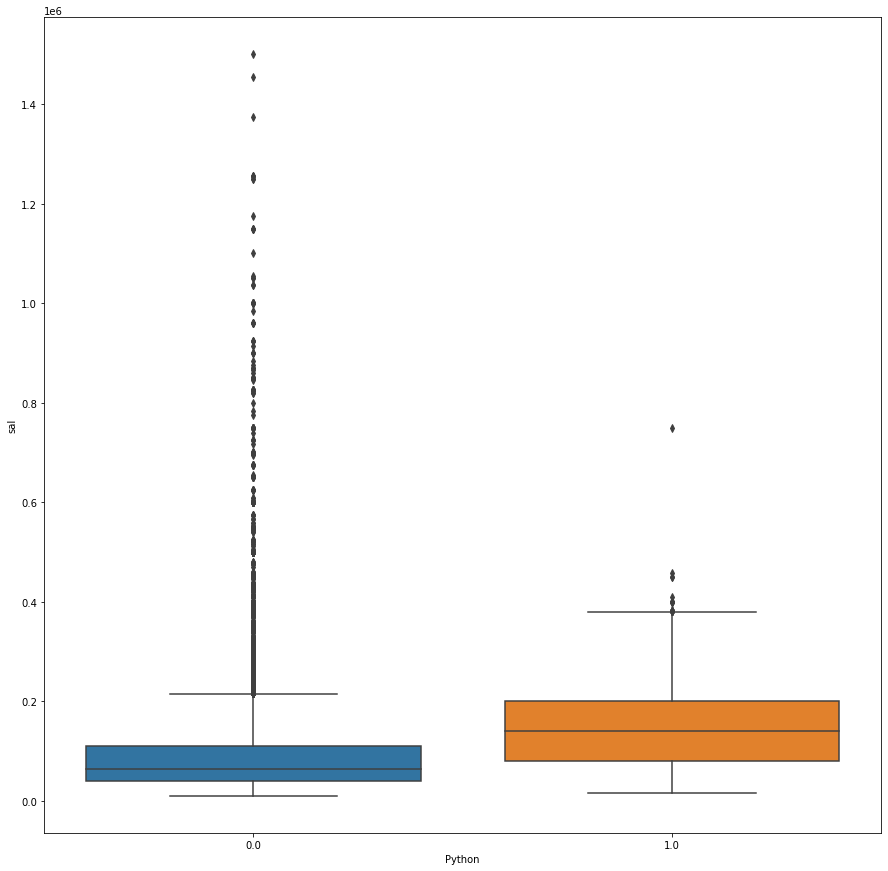

In [97]:
plt.figure(figsize=(15,15))
sns.boxplot (x = one_hot_encoded_skillz['Python'], y = salary)

### THIS WHOLE ONE-HOT-ENCODING AND PIVOT TRANSFORMATION WAS MADE TO ENABLE SUCH PLOTS AS ABOVE

In [70]:
salary>=10000

0        False
1         True
2        False
3         True
4         True
         ...  
69651    False
69652     True
69653     True
69654     True
69655    False
Name: sal, Length: 69656, dtype: bool

In [98]:
df_skills

,index,Skillz,Values
0,1,Git,1
1,1,SQL,1
2,1,Тестирование,1
3,1,C#,1
4,1,API,1
...,...,...,...
343805,69655,Информационная безопасность,1
343806,69655,Аудит безопасности,1
343807,69655,Средства криптографической защиты информации,1
343808,69655,Английский язык,1


In [99]:
salary

0             NaN
1         32625.0
2             NaN
3         22620.0
4         20000.0
           ...   
69651         NaN
69652    130000.0
69653     50000.0
69654     85000.0
69655         NaN
Name: sal, Length: 69656, dtype: float64

### TASK: MERGE DF_SKILLS & SALARY ON INDEX COLUMN [index] left_on = 'index',right_index = True
    EXAMINE BOXPLOTS DATA = DF_SKILLS(MERGED), Y  = SALARY
    ON PYTHON, JAVA, C#, C++, SQL,

In [100]:
df_skills

,index,Skillz,Values
0,1,Git,1
1,1,SQL,1
2,1,Тестирование,1
3,1,C#,1
4,1,API,1
...,...,...,...
343805,69655,Информационная безопасность,1
343806,69655,Аудит безопасности,1
343807,69655,Средства криптографической защиты информации,1
343808,69655,Английский язык,1


In [104]:
salary.shape


(69656,)

In [105]:
my_merg = pd.merge(df_skills,salary,left_on='index',right_index=True)

In [117]:
java_mask = my_merg['Skillz'].str.lower().str.startswith('java')

In [121]:
my_merg['Skillz'][java_mask].value_counts()

JavaScript     2777
Java           2315
Java Script     100
Java SE          90
Java EE          53
Java Core        41
Name: Skillz, dtype: int64

In [112]:
salary.isnull().sum()

32689

<AxesSubplot:xlabel='Skillz', ylabel='sal_log10'>

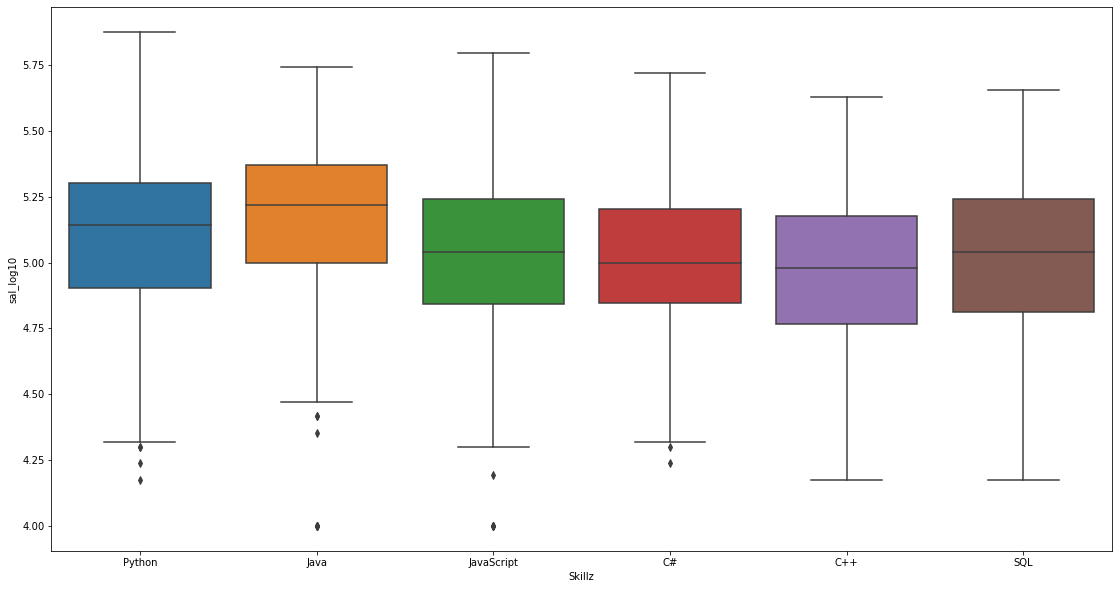

In [128]:
plt.figure(figsize=(19,10))
sns.boxplot(x='Skillz',y  ='sal_log10', data = my_merg.assign(sal_log10 = np.log10(my_merg['sal'])), order=list(('Python', 'Java','JavaScript','C#', 'C++', 'SQL')))

<AxesSubplot:xlabel='Skillz', ylabel='sal'>

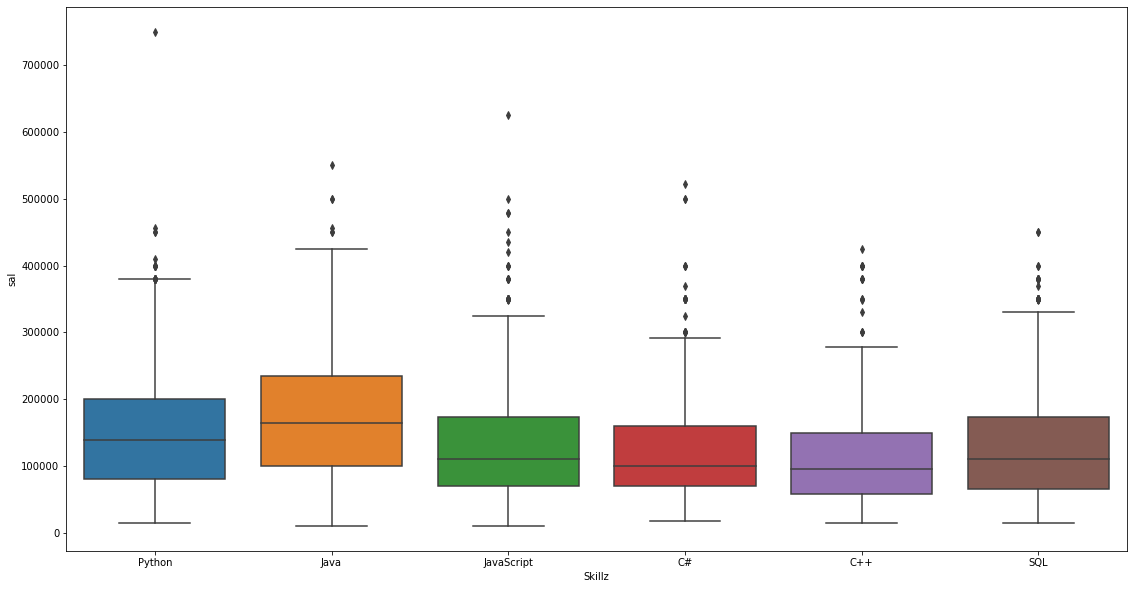

In [130]:
plt.figure(figsize=(19,10))
sns.boxplot(x='Skillz',y  ='sal', data = my_merg, order=list(('Python', 'Java','JavaScript','C#', 'C++', 'SQL')))

In [129]:
my_merg.assign(sal_log10 = np.log10(my_merg['sal']))

,index,Skillz,Values,sal,sal_log10
0,1,Git,1,32625.0,4.513551
1,1,SQL,1,32625.0,4.513551
2,1,Тестирование,1,32625.0,4.513551
3,1,C#,1,32625.0,4.513551
4,1,API,1,32625.0,4.513551
...,...,...,...,...,...
343805,69655,Информационная безопасность,1,NaN,NaN
343806,69655,Аудит безопасности,1,NaN,NaN
343807,69655,Средства криптографической защиты информации,1,NaN,NaN
343808,69655,Английский язык,1,NaN,NaN


# LONGFORM(TIDY) VS PIVOT_TABLE 

In [31]:
curr_dict = {'RUR':1,'USD':56.2996, 'EUR':57.921, 'KZT':13.5040}

In [32]:
curr_dict

{'RUR': 1, 'USD': 56.2996, 'EUR': 57.921, 'KZT': 13.504}

In [33]:
sal_dec_df['currency'].map(curr_dict)

0        NaN
1        1.0
2        NaN
3        1.0
4        1.0
        ... 
69651    NaN
69652    1.0
69653    1.0
69654    1.0
69655    NaN
Name: currency, Length: 69656, dtype: float64

In [34]:
def cur (val):
    if val == 'RUR':
        return  1
    if val == 'USD':
        return  56.2996
    if val == 'EUR':
        return  57.921
    if val == 'KZT':
        return  13.5040
    
        
    return val

In [37]:
cur('RND')

'RND'

In [38]:
for val in sal_dec_df['currency']:
    print(cur(val))

nan
1
nan
1
1
1
nan
1
1
1
1
nan
1
nan
1
1
1
1
1
nan
nan
1
nan
nan
nan
1
nan
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
1
1
nan
1
1
1
nan
1
1
1
1
1
nan
1
1
1
nan
1
1
1
1
nan
1
nan
nan
nan
nan
nan
nan
1
nan
1
1
nan
1
1
1
nan
1
1
nan
nan
1
1
1
1
nan
nan
1
1
1
nan
1
1
1
nan
1
nan
nan
1
1
nan
1
nan
1
nan
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
1
1
1
nan
nan
nan
1
1
1
1
1
nan
nan
nan
1
1
1
nan
1
nan
nan
1
1
nan
1
1
1
1
1
1
nan
1
1
1
1
1
nan
1
1
nan
nan
1
nan
nan
1
nan
nan
1
nan
1
nan
1
nan
1
1
1
1
1
1
1
nan
nan
nan
nan
nan
1
nan
1
nan
nan
1
nan
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
nan
nan
1
nan
1
1
1
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
1
1
1
1
1
nan
nan
1
1
nan
nan
nan
1
1
nan
1
1
1
1
1
nan
1
1
1
nan
1
nan
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
1
1
nan
nan
nan
nan
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
nan
1
1
1
1
nan
nan
nan
nan
nan
1
1
nan
1
nan
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
nan
nan
1
1
1
1
1
1
nan
1
1
1
1
1
1
nan
nan
1
1
1
1
nan
nan
nan
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
nan
nan
nan
nan
1
nan
1
1
1
nan
1
1
nan
1
1
1
nan
1
nan
1
1
1
nan
nan
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
nan
1
1
1
1
nan
1
nan
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
nan
nan
1
nan
nan
nan
nan
1
1
1
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
1
1
1
nan
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
1
nan
nan
nan
1
1
nan
1
1
nan
1
1
nan
nan
nan
nan
nan
1
1
nan
nan


1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
nan
1
1
nan
nan
nan
nan
nan
1
1
1
nan
1
1
1
nan
nan
nan
nan
nan
1
nan
1
1
1
nan
1
1
nan
1
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
nan
nan
nan
1
1
nan
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
1
1
1
1
nan
1
1
nan
nan
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
nan
1
1
nan
1
1
nan
1
nan
1
1
1
1
nan
1
1
1
1
1
nan
1
1
1
nan
1
1
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
1
nan
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
1
nan
nan
1
nan
nan
nan
1
nan
nan
nan
1
1
1
1
1
nan
1
nan
1
1
1
1
1
1
1
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
nan
1
nan
1
nan
nan
1
1
1
nan
1
nan
1
1
1
1
1
1
nan
1
nan
nan
1
nan
nan
1
1
1
1
1
nan
1
1
1
1
1
1
nan
1
nan
nan
1
nan
1
1
nan
1
1
1
1
1
1
nan
nan
1
nan
1
1
1


nan
nan
nan
nan
nan
1
1
1
1
1
1
nan
nan
nan
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
1
1
nan
1
1
1
1
1
1
nan
nan
1
1
nan
nan
nan
1
1
1
1
nan
1
1
nan
nan
nan
nan
nan
1
1
1
nan
nan
1
nan
nan
nan
nan
1
1
1
1
nan
1
1
nan
1
nan
nan
nan
1
1
nan
nan
1
1
nan
nan
1
1
nan
nan
1
nan
1
1
nan
1
nan
nan
nan
nan
1
1
1
nan
nan
1
1
nan
1
1
1
nan
1
1
1
1
nan
nan
1
nan
1
1
1
nan
nan
1
1
nan
nan
nan
nan
nan
1
1
1
nan
nan
1
nan
1
1
1
1
nan
1
1
1
1
1
56.2996
nan
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
1
1
nan
1
1
1
nan
nan
nan
1
nan
1
nan
1
nan
1
1
1
nan
1
1
1
1
1
1
nan
nan
1
nan
nan
nan
nan
1
1
nan
nan
nan
nan
1
1
nan
1
1
1
nan
1
nan
nan
1
1
1
1
1
1
1
nan
nan
1
1
nan
1
1
1
nan
1
1
nan
nan
1
nan
1
1
1
1
nan
1
nan
1
nan
1
1
1
1
1
nan
1
1
1
1
nan
nan
1
1
1
1
1
1
1
nan
1
1
nan
nan
1
1
1
1
nan
nan
1
nan
1
1
1
nan
nan
1
nan
1
nan
1
nan
nan
nan
1
nan
nan
nan
1
1
nan
nan
nan
1
1
nan
1
56.2996
nan
1
1
nan
nan
nan
1
1
1
1
nan
1
1
1
1
1
56.2996
1
1
1
nan
1
nan
nan
nan
1
nan
1
nan
1
nan
1
1
nan
1
nan
1
nan
nan
nan
1
1
1
1
1
nan
1


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
1
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
nan
1
1
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
1
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
56.2996
nan
1
1
1
nan
nan
nan
nan
1
nan
1
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
nan
1
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
nan
nan
1
1
nan
1
nan
nan
1
nan
nan
nan
1
nan
nan
57.921
57.921
57.921
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
nan
nan
1
nan
1
nan
nan
1
nan
nan
1
nan
nan
1
nan
1
1
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
1
1
56.2996
56.2996
nan
1
nan
nan
1
nan
nan
nan
nan
nan
1
1
nan
nan
nan
1
nan
1
1
nan
nan
nan
nan

nan
nan
nan
nan
1
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
1
nan
nan
1
nan
1
1
1
nan
nan
1
1
nan
1
1
nan
1
56.2996
nan
nan
nan
nan
1
1
nan
nan
1
nan
1
nan
56.2996
1
1
nan
nan
nan
1
1
nan
nan
nan
1
1
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
1
1
1
nan
nan
56.2996
1
nan
1
1
nan
nan
nan
1
nan
nan
1
1
1
nan
1
1
nan
nan
nan
1
nan
nan
nan
nan
nan
1
1
1
1
nan
nan
nan
nan
1
1
nan
nan
1
nan
nan
nan
nan
1
nan
1
nan
1
nan
1
nan
nan
1
nan
1
1
1
1
1
1
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
1
1
1
nan
1
nan
1
1
nan
nan
1
nan
nan
1
1
1
nan
1
1
nan
nan
1
1
nan
nan
nan
nan
nan
1
nan
nan
1
nan
1
1
nan
56.2996
nan
1
nan
nan
1
1
nan
nan
nan
1
1
nan
nan
1
1
nan
nan
nan
nan
nan
nan
1
nan
1
nan
1
nan
1
nan
1
nan
nan
nan
nan
1
1
1
nan
1
1
1
1
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
1
1
nan
nan
1
nan
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
nan
1
1
1
nan
56.2996
nan
na

1
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
1
1
nan
1
nan
nan
nan
1
nan
1
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
56.2996
nan
nan
nan
1
nan
nan
nan
1
nan
56.2996
nan
57.921
nan
1
nan
nan
1
nan
1
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
1
nan
nan
1
nan
1
1
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
nan
56.2996
nan
nan
nan
nan
nan
1
1
nan
nan
nan
1
nan
1
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
57.921
nan
nan
nan
nan
1
nan
1
1
1
1
1
nan
1
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
nan
nan
nan
1
nan
nan
1
nan
nan
57.921
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
1
nan
1
nan
nan
nan
nan
1
nan
nan
1
1
nan
1
nan
nan
nan
nan
1
nan
nan
nan
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
n

nan
1
1
nan
1
1
1
nan
nan
nan
1
1
1
nan
nan
1
1
1
nan
1
1
nan
1
nan
nan
1
1
1
nan
1
nan
nan
1
nan
nan
1
1
1
nan
nan
nan
nan
1
56.2996
nan
nan
nan
nan
1
nan
nan
nan
1
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
1
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
1
1
nan
1
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
1
nan
1
nan
1
1
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
1
nan
1
1
nan
1
1
nan
nan
1
nan
nan
1
1
1
1
1
1
1
1
nan
nan
nan
nan
1
nan
nan
1
1
nan
nan
1
1
1
nan
1
nan
nan
nan
1
1
1
1
nan
nan
nan
nan
nan
1
nan
nan
1
1
1
nan
56.2996
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
1
nan
1
1
1
nan
nan
1
1
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
56.2996
nan
nan
nan
1
nan
1
1
nan
1
nan
nan
nan
1
nan
57.921
nan
nan
nan
nan
1
1
nan
nan
nan
1
nan

nan
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
nan
1
1
1
1
1
nan
nan
nan
nan
nan
1
1
nan
1
1
nan
nan
nan
nan
1
nan
nan
nan
1
1
nan
nan
nan
nan
1
1
nan
nan
nan
1
nan
nan
1
1
nan
1
1
nan
1
1
nan
nan
1
1
nan
1
1
nan
1
nan
nan
1
nan
nan
nan
1
nan
nan
1
1
1
nan
nan
1
1
nan
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
1
1
1
1
nan
nan
nan
nan
1
1
nan
nan
1
1
1
nan
nan
nan
1
1
nan
nan
1
1
1
nan
1
nan
1
nan
nan
nan
nan
1
1
1
1
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
nan
nan
nan
1
nan
nan
nan
nan
nan
1
1
1
1
nan
nan
1
1
1
1
nan
nan
nan
1
1
1
1
1
1
nan
1
1
1
1
1
nan
nan
1
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
1
nan
1
nan
nan
1
1
nan
nan
nan
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
nan
1
1
1
1
1
1
1
1
nan
1
1
nan
nan
1
nan
1
nan
1
nan
1
1
1
1
nan
nan
nan
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
nan
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
nan
nan
1
nan
nan
nan
1
nan
nan
1
nan
nan
1
1
1
nan


1
1
nan
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
nan
1
nan
1
nan
1
1
1
1
1
1
nan
1
nan
nan
nan
nan
nan
nan
1
1
1
nan
1
nan
nan
nan
nan
nan
1
1
nan
1
1
1
nan
1
1
nan
nan
1
1
1
1
nan
nan
nan
1
1
nan
1
1
nan
nan
1
nan
nan
1
1
nan
1
1
1
1
nan
1
1
nan
1
1
1
nan
nan
nan
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
nan
nan
nan
1
nan
1
1
1
nan
1
nan
1
nan
nan
1
1
nan
1
nan
1
nan
nan
1
1
nan
1
1
nan
1
nan
nan
1
1
1
1
1
nan
1
nan
nan
1
1
1
nan
1
1
nan
1
1
nan
1
1
1
1
1
nan
1
nan
nan
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
1
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
1
1
nan
nan
nan
nan
1
nan
1
1
1
nan
1
57.921
1
1
nan
1
1
nan
1
1
1
1
nan
nan
1
nan
1
1
1
1
nan
nan
nan
nan
nan
1
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
1
1
nan
1
1
1
nan
1
1
nan
1
1
1
nan
1
1
nan
1

1
nan
1
1
1
1
nan
nan
nan
1
nan
nan
1
nan
1
nan
1
nan
1
1
nan
1
1
nan
1
1
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
1
1
nan
1
1
1
nan
nan
nan
1
1
1
nan
nan
1
1
nan
nan
1
nan
nan
nan
nan
nan
1
nan
1
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
1
1
1
nan
1
1
nan
1
1
1
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
1
1
1
nan
1
nan
1
nan
1
nan
nan
1
nan
1
1
1
1
1
1
1
nan
1
1
1
1
nan
nan
nan
nan
1
nan
nan
nan
1
nan
nan
nan
nan
nan
1
1
nan
1
nan
1
1
1
nan
1
nan
1
nan
1
1
nan
nan
nan
1
1
1
1
nan
1
nan
nan
nan
1
1
nan
nan
nan
1
1
1
1
nan
1
nan
1
nan
1
nan
1
nan
1
1
nan
1
nan
1
1
nan
nan
1
1
1
1
1
nan
nan
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
nan
nan
nan
1
nan
1
1
1
1
1
1
nan
1
nan
nan
nan
1
nan
1
1
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
1
1
1
1
1
1
1
1
1
nan
nan
1
1
nan
1
1
1
1
nan
1


nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
1
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
nan
1
nan
1
nan
1
nan
nan
1
nan
nan
nan
nan
nan
1
nan
1
1
1
1
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
1
1
1
1
nan
1
nan
nan
nan
1
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
1
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
1
nan
nan
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
nan
1
nan
nan
nan
1
nan
nan
1
1
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
1
nan
nan
nan
nan
1
1
1
1
nan
nan
nan
1
1
nan
nan
1
nan
na

1
nan
56.2996
1
1
nan
1
nan
1
1
1
1
1
1
1
1
1
nan
1
nan
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
1
1
1
1
1
nan
nan
1
1
1
56.2996
1
nan
nan
56.2996
1
nan
1
1
1
1
nan
nan
1
1
nan
nan
1
nan
nan
nan
56.2996
nan
56.2996
1
1
1
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
1
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
1
nan
1
56.2996
nan
nan
1
nan
1
1
nan
1
nan
nan
nan
1
1
nan
1
1
nan
1
1
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
1
1
1
1
nan
56.2996
56.2996
nan
nan
nan
nan
nan
1
nan
1
nan
56.2996
nan
1
nan
1
1
1
nan
1
56.2996
nan
1
nan
1
1
1
nan
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
1
1
nan
nan
nan
nan
1
nan
nan
1
nan
1
nan
1
1
nan
nan
nan
1
nan
nan
nan
1
nan
nan
1
nan
1
1
nan
1
nan
nan
1
1
nan
1
1
nan
nan
1
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
1
nan
nan
nan
56.2996
nan
1
1
nan
1
1
nan
1
nan
1
1
nan
1
1
nan
1
nan
nan
nan
1
nan
1
1
1
1
nan
nan
nan
nan
nan
1
56.2996
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
nan
nan
56.2996
nan
1
nan
nan
1


1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
nan
nan
nan
nan
nan
nan
nan
1
nan
1
1
nan
1
nan
1
1
1
1
1
nan
1
1
1
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
1
nan
1
1
1
nan
nan
nan
nan
1
1
nan
nan
1
nan
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
nan
1
1
1
1
1
1
nan
nan
nan
1
1
nan
1
nan
nan
nan
1
nan
nan
nan
1
nan
1
1
nan
nan
1
nan
nan
nan
nan
1
1
1
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
1
1
nan
1
nan
nan
1
nan
1
1
1
1
1
1
nan
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
nan
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
nan
nan
nan
nan
1
1
1
1
1
1
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
1
1
1
1
nan
nan
nan
1
1
1
1
1
nan
1
1
1
1
nan
nan
1
1
1
nan
nan
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
nan
nan
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
nan
1
1
1
1
1
1
nan
1
1
1
1
nan
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
nan
1
1
1
na

nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
nan
1
nan
1
nan
1
nan
1
1
1
nan
nan
1
nan
1
nan
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
nan
nan
1
1
nan
1
1
1
1
1
1
1
1
1
nan
1
nan
nan
nan
1
1
nan
1
nan
1
nan
1
1
nan
1
1
1
1
1
nan
1
1
nan
nan
1
nan
nan
nan
1
nan
nan
1
nan
1
1
nan
1
nan
1
nan
nan
nan
1
nan
1
1
1
nan
nan
1
1
1
nan
nan
nan
nan
nan
1
1
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
1
nan
nan
1
nan
nan
nan
1
1
nan
1
1
1
1
1
nan
1
nan
1
nan
1
nan
nan
1
1
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
1
1
1
1
nan
1
1
1
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
nan
1
nan
1
1
1
nan
1
1
1
nan
nan
nan
1
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
nan
1
nan
nan
nan
1
nan
1
nan
nan
1
1
1
1
nan
1
nan
1
nan
nan
nan
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
nan
nan
1
1
nan
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
nan
1
1
1
nan
nan
nan
1


1
1
1
1
nan
nan
nan
nan
1
1
1
nan
1
1
1
1
1
1
1
1
1
nan
nan
1
1
1
nan
1
nan
1
1
1
1
1
nan
1
nan
nan
nan
nan
1
nan
nan
nan
nan
1
nan
nan
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
nan
nan
nan
1
1
1
1
nan
1
1
1
nan
1
1
1
1
1
1
nan
1
nan
1
1
1
nan
1
1
1
1
1
1
nan
1
nan
nan
1
nan
1
1
nan
1
1
1
1
nan
1
1
1
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
nan
1
nan
1
nan
nan
nan
nan
1
1
1
nan
1
1
1
nan
nan
1
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
1
nan
1
1
1
1
1
nan
1
nan
nan
nan
nan
nan
1
1
1
1
1
1
nan
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
nan
1
1
nan
1
1
1
1
1
1
1
nan
nan
nan
1
1
1
nan
1
1
nan
1
nan
1
1
1
nan
1
nan
nan
1
1
nan
1
1
1
1
1
1
1
1
nan
nan
nan
1
1
1
1
1
nan
1
nan
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
1
nan
nan
1
1
1
nan
1
1
1
1
1
nan
1
nan
nan
nan
1
1
1
nan
nan
nan
nan
1
nan
1
1
1
nan
nan
nan
nan
nan
1
nan
nan
nan
1
1
1
1
1
1
1
nan
nan
nan
nan
nan
1
1
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
1
nan
nan
nan
nan
na

In [41]:
sal_dec_df['currency'].apply(cur)

0        NaN
1        1.0
2        NaN
3        1.0
4        1.0
        ... 
69651    NaN
69652    1.0
69653    1.0
69654    1.0
69655    NaN
Name: currency, Length: 69656, dtype: float64

In [40]:
for val in sal_dec_df['currency']:
    print(curr_dict.get(val,np.NaN))

nan
1
nan
1
1
1
nan
1
1
1
1
nan
1
nan
1
1
1
1
1
nan
nan
1
nan
nan
nan
1
nan
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
1
1
nan
1
1
1
nan
1
1
1
1
1
nan
1
1
1
nan
1
1
1
1
nan
1
nan
nan
nan
nan
nan
nan
1
nan
1
1
nan
1
1
1
nan
1
1
nan
nan
1
1
1
1
nan
nan
1
1
1
nan
1
1
1
nan
1
nan
nan
1
1
nan
1
nan
1
nan
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
1
1
1
nan
nan
nan
1
1
1
1
1
nan
nan
nan
1
1
1
nan
1
nan
nan
1
1
nan
1
1
1
1
1
1
nan
1
1
1
1
1
nan
1
1
nan
nan
1
nan
nan
1
nan
nan
1
nan
1
nan
1
nan
1
1
1
1
1
1
1
nan
nan
nan
nan
nan
1
nan
1
nan
nan
1
nan
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
nan
nan
1
nan
1
1
1
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
1
1
1
1
1
nan
nan
1
1
nan
nan
nan
1
1
nan
1
1
1
1
1
nan
1
1
1
nan
1
nan
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
1
1
nan
nan
nan
nan
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
nan
1
1
1
1
nan
nan
nan
nan
nan
1
1
nan
1
nan
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
nan
nan
1
1
1
1
1
1
nan
1
1
1
1
1
1
nan
nan
1
1
1
1
nan
nan
nan
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
nan
nan
nan
nan
1
nan
1
1
1
nan
1
1
nan
1
1
1
nan
1
nan
1
1
1
nan
nan
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
nan
1
1
1
1
nan
1
nan
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
nan
nan
1
nan
nan
nan
nan
1
1
1
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
1
1
1
nan
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
1
nan
nan
nan
1
1
nan
1
1
nan
1
1
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
1
nan
1
1


nan
nan
1
nan
nan
nan
1
1
nan
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
nan
1
1
nan
nan
nan
nan
nan
1
1
1
nan
1
1
1
nan
nan
nan
nan
nan
1
nan
1
1
1
nan
1
1
nan
1
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
nan
nan
nan
1
1
nan
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
1
1
1
1
nan
1
1
nan
nan
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
nan
1
1
nan
1
1
nan
1
nan
1
1
1
1
nan
1
1
1
1
1
nan
1
1
1
nan
1
1
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
1
nan
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
1
nan
nan
1
nan
nan
nan
1
nan
nan
nan
1
1
1
1
1
nan
1
nan
1
1
1
1
1
1
1
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
nan
1
nan
1
nan
nan
1
1
1
nan
1
nan
1
1
1
1
1
1
nan
1
nan
nan
1
nan
nan
1
1
1
1
1
nan
1
1
1
1
1
1
nan
1
nan
nan
1
na

nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
56.2996
1
nan
1
1
nan
1
nan
1
nan
nan
nan
nan
nan
1
nan
1
1
1
1
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
1
nan
nan
nan
nan
1
1
nan
1
1
nan
nan
nan
1
1
nan
nan
nan
nan
1
nan
1
1
1
nan
nan
nan
nan
nan
1
1
1
1
1
1
nan
1
1
1
1
nan
1
nan
nan
nan
1
nan
nan
nan
1
nan
1
nan
nan
1
1
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
1
1
nan
nan
1
1
nan
1
nan
nan
nan
1
nan
nan
nan
1
nan
nan
nan
1
1
nan
nan
1
nan
1
nan
nan
1
nan
nan
1
1
nan
1
nan
1
nan
nan
1
1
1
nan
nan
nan
nan
1
nan
1
nan
1
1
1
nan
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
nan
1
nan
nan
1
1
1
1
1
nan
1
1
1
1
nan
1
1
nan
1
1
nan
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
nan
nan
1
1
1
1
1
nan
1
nan
nan
nan
1
1
1
1
1
1
1
nan
1
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
nan
1
1
1
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
nan
1
nan
1
1
1
1
1
1
nan
1
nan
nan
1
nan
1
1
1
1
nan
1
1
1
nan
1
nan
1
1


1
nan
nan
56.2996
1
1
nan
1
nan
nan
1
56.2996
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
nan
1
1
nan
1
nan
nan
1
nan
1
1
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
1
nan
nan
1
56.2996
1
1
nan
1
1
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
1
1
nan
nan
1
nan
nan
1
nan
nan
nan
1
1
1
nan
nan
1
nan
56.2996
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
1
nan
nan
1
nan
1
1
1
1
nan
nan
1
nan
1
1
1
1
nan
nan
nan
1
1
1
1
nan
nan
1
1
1
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
1
1
1
nan
nan
nan
1
1
nan
1
nan
nan
nan
nan
nan
1
nan
1
nan
1
1
1
1
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
1
1
1
nan
1
nan
nan
1
1
1
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
56.2996
1
nan
nan
nan
nan
1
nan
56.2996
1
1
nan
1
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
nan
nan
1
1
1
nan
nan
1
1
1
1
1
1
nan
nan
nan
nan
nan
1
nan
nan
1
1
nan


1
1
1
1
1
1
nan
nan
1
nan
nan
nan
1
1
1
1
1
1
nan
nan
nan
1
1
1
1
nan
1
1
1
1
1
1
nan
1
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
1
nan
1
1
1
1
nan
1
nan
1
nan
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
nan
1
nan
nan
1
nan
nan
nan
1
1
1
1
nan
1
1
nan
1
1
1
56.2996
1
1
nan
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
nan
1
nan
nan
1
1
1
1
nan
nan
1
nan
1
1
1
1
1
1
1
1
1
nan
nan
1
1
1
nan
nan
1
nan
nan
nan
1
nan
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
1
1
nan
nan
1
1
1
1
1
1
1
nan
1
nan
nan
nan
1
1
nan
nan
1
1
1
nan
1
nan
nan
1
1
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
1
1
1
1
nan
nan
nan
1
1
nan
nan
1
1
1
nan
1
1
1
nan
1
1
1
nan
1
1
nan
1
nan
nan
nan
1
nan
nan
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
1
nan
1
nan
1
1
nan
1
1
nan
1
1
1
1
nan
1
1
1
1
nan
1
nan
1
1
1
1
1
nan
1
1
nan
1
nan
1
1
1
1
nan
nan
nan
1
1
1
nan
nan
1
nan
1
1
nan
1
1
nan
1
1
nan
1
1
nan
1
1
nan
nan
1
1
nan
nan
nan
1
nan
1
nan
1
nan
nan
nan
1
nan
1
1
nan
1
nan
1
1
1
1
nan
1
nan
1
nan
1
nan
1
1
nan
1
1
nan
nan
nan
1
nan
1
nan
1
1
na

nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
nan
1
nan
nan
nan
nan
nan
1
1
1
1
1
nan
1
1
1
1
1
nan
1
56.2996
nan
nan
1
1
nan
nan
1
1
1
nan
nan
1
1
nan
1
1
nan
nan
1
nan
1
1
1
1
1
1
1
nan
nan
1
nan
1
nan
1
1
nan
nan
nan
nan
nan
1
1
nan
1
1
1
1
nan
1
1
1
1
1
1
1
nan
1
1
1
1
1
nan
1
1
1
nan
nan
1
1
1
nan
1
1
1
1
1
1
1
nan
1
nan
1
nan
1
1
1
nan
1
nan
1
1
nan
1
1
1
57.921
nan
1
nan
1
1
1
1
nan
1
1
1
nan
1
1
nan
1
nan
1
nan
1
nan
1
1
1
57.921
1
nan
1
nan
nan
nan
1
nan
1
1
1
nan
1
1
nan
1
1
nan
nan
1
1
1
1
nan
1
1
1
1
nan
nan
1
1
1
1
1
1
nan
nan
nan
nan
nan
1
1
57.921
nan
1
1
1
1
nan
nan
1
1
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
1
nan
1
1
1
nan
1
nan
nan
1
nan
nan
nan
nan
1
1
1
1
1
nan
nan
1
nan
nan
1
1
nan
nan
nan
1
nan
nan
1
1
nan
1
nan
1
1
nan
1
nan
1
nan
1
nan
1
1
1
1
nan
1
1
1
1
1
1
nan
1
nan
nan
nan
nan
1
1
nan
nan
nan
nan
1
nan
nan
nan
1
1
1
nan
nan
nan
nan
nan
1
nan
1
1
1
nan
1
nan
1
nan
1
1
nan
nan
1
1
1
nan
1
56.2996
1
nan
nan
1
1
1
1
1
1
1
nan
nan
1
nan
1
nan
1
nan
nan
nan
n

1
nan
1
nan
nan
1
nan
1
nan
1
nan
1
1
1
1
nan
1
nan
1
nan
1
nan
1
1
1
1
nan
nan
1
1
nan
1
1
1
nan
nan
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
nan
nan
1
nan
nan
nan
nan
1
1
1
1
nan
1
1
nan
nan
1
1
1
1
1
1
1
nan
nan
1
1
1
1
nan
1
1
1
1
1
1
nan
1
1
nan
1
1
nan
1
1
1
nan
1
nan
1
nan
nan
1
1
nan
1
1
1
1
1
1
1
1
nan
nan
1
nan
nan
1
1
nan
nan
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
1
1
1
1
nan
nan
nan
nan
nan
1
1
1
nan
1
1
nan
1
nan
1
1
1
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
1
nan
1
1
nan
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
1
1
nan
nan
1
nan
1
1
1
1
1
nan
1
nan
nan
nan
1
nan
1
nan
1
1
nan
nan
1
1
1
1
nan
nan
1
1
1
nan
nan
nan
1
nan
1
1
1
nan
nan
nan
1
nan
1
nan
1
1
1
1
1
nan
1
nan
nan
1
1
1
1
1
nan
1
1
1
1
1
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
nan
nan
nan
1
nan
nan
1
1
nan
1
nan
1
1
1
nan
1
1
1
nan
nan
1
1
1
nan
nan
1
nan
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


nan
nan
nan
1
nan
1
1
nan
nan
nan
1
1
1
1
nan
nan
nan
nan
1
1
1
1
1
1
1
1
nan
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
nan
1
1
nan
1
nan
nan
nan
1
1
1
nan
1
1
1
nan
nan
1
1
nan
nan
nan
nan
1
1
1
1
nan
nan
1
1
nan
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
nan
1
1
1
1
nan
nan
nan
1
nan
1
1
nan
nan
1
nan
nan
1
nan
nan
1
nan
1
1
1
1
1
nan
1
1
nan
1
nan
nan
nan
1
nan
1
nan
nan
nan
1
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
1
nan
nan
1
nan
1
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
nan
nan
1
1
1
nan
1
1
nan
1
1
1
1
nan
1
1
1
1
1
1
nan
1
nan
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
nan
1
1
nan
1
nan
1
1
nan
nan
1
1
1
nan
nan
1
nan
1
nan
1
1
1
1
1
1
1
nan
1
1
nan
1
1
nan
1
1
1
nan
1
1
nan
1
1
1
1
1
1
1
nan
nan


1
1
1
nan
nan
56.2996
nan
1
1
1
nan
1
1
1
nan
nan
1
1
nan
nan
nan
1
nan
nan
nan
1
nan
nan
1
nan
1
nan
1
1
nan
1
1
1
1
1
1
nan
1
nan
1
1
nan
1
nan
nan
nan
1
nan
1
1
1
1
nan
1
1
1
nan
1
1
1
nan
1
1
nan
nan
1
1
1
1
nan
nan
1
1
1
1
1
1
1
nan
1
nan
nan
1
nan
1
1
1
1
1
1
1
1
1
nan
1
nan
nan
1
nan
nan
1
nan
nan
nan
nan
1
1
1
nan
1
1
nan
nan
nan
1
1
1
nan
1
1
1
nan
1
nan
1
1
1
1
nan
1
nan
1
nan
1
1
nan
nan
nan
nan
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
nan
1
1
1
1
1
1
nan
nan
1
1
1
1
1
1
1
nan
nan
1
1
1
nan
1
1
nan
1
1
1
1
1
56.2996
1
1
1
1
1
nan
nan
nan
1
1
nan
1
1
1
nan
1
1
1
1
1
1
1
nan
nan
1
1
1
1
1
nan
1
1
1
1
nan
1
nan
nan
1
1
1
1
nan
1
nan
1
1
1
nan
nan
1
1
1
1
nan
nan
1
1
1
1
1
1
nan
nan
1
1
1
nan
nan
nan
nan
1
nan
nan
1
1
1
1
1
1
nan
1
1
nan
nan
1
1
1
1
1
1
1
nan
nan
1
nan
nan
nan
1
1
1
nan
1
1
1


nan
nan
nan
nan
nan
nan
56.2996
1
nan
1
nan
nan
nan
nan
1
nan
nan
nan
nan
1
1
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
nan
1
1
nan
nan
nan
1
1
nan
nan
nan
1
nan
nan
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
1
nan
nan
nan
1
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
1
nan
nan
nan
1
nan
nan
1
nan
1
1
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
1
56.2996
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
56.2996
1
nan
nan
1
nan
nan
1
1
nan
nan
nan
nan
nan
1
1
1
nan
nan
1
1
1
1
1
1
nan
1
1
nan
nan
1
1
nan
nan
nan
1
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
1
1
nan
1
1
nan
1
1
nan
1
nan
1
1
nan
nan
nan
1
nan
1
nan
nan
1
1
1
nan
nan
nan
nan
1
1
nan
1
56.2996
nan
nan
1
1
nan
nan
nan
1
1
nan
1
nan
nan
1
nan
1
nan
nan
nan
56.2996
1
nan
nan
nan
nan
nan
1
nan
1
1
1
nan
1
1
1
1
1
nan
nan
nan
1
nan
nan
1
1
nan
nan
1
nan
1
nan
nan
1
1
nan
1
nan
nan
nan
1
1
1
1
nan
nan
1
nan
nan
nan
nan
nan
1
1
na

nan
1
nan
1
1
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
1
nan
1
1
nan
nan
1
nan
1
nan
nan
1
nan
1
nan
1
nan
nan
nan
1
1
nan
nan
nan
nan
1
1
1
1
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
nan
1
nan
1
nan
nan
nan
nan
57.921
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
nan
1
1
1
nan
nan
1
nan
nan
1
nan
1
nan
1
nan
nan
nan
1
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
1
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
56.2996
1
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
1
1
nan
nan
nan
nan
1
1
nan
1
1
1
1
nan
1
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
1
nan
nan
57.921
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
1
56.2996
56.2996
nan
1
1
1
1
nan
nan
1
1
na

1
1
1
nan
nan
1
1
1
1
1
1
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
1
nan
1
1
nan
1
1
1
1
nan
nan
1
1
1
1
1
1
1
nan
1
nan
nan
nan
nan
1
nan
1
1
1
1
1
nan
nan
1
1
nan
nan
1
1
nan
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
1
1
56.2996
1
1
nan
1
nan
1
1
1
1
nan
nan
nan
1
nan
nan
nan
1
1
1
1
1
1
1
1
nan
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
1
1
1
1
1
nan
nan
nan
nan
1
1
1
1
nan
56.2996
nan
nan
1
1
nan
nan
nan
1
nan
1
nan
1
1
nan
1
1
1
nan
1
1
1
nan
nan
1
1
nan
1
1
1
1
nan
1
nan
1
1
nan
1
nan
1
nan
1
1
1
nan
1
nan
1
nan
1
1
nan
1
1
1
1
1
1
nan
nan
nan
1
nan
nan
1
1
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
1
nan
1
nan
1
nan
1
nan
nan
1
1
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
1
1
nan
nan
nan
nan
nan
nan
1
1
nan
1
1
nan
nan
1
nan
nan
nan
nan
1
1
nan
nan
1
nan
1
1
1
1
nan
nan
1
nan
nan
nan
1
1
nan
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
nan
nan
1
1
1
1
nan
nan
1
1
nan
1
nan
1
1
1
nan
nan
nan
nan
1
1
1
1
1
nan
1
1
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
1
1
nan
nan


1
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
nan
1
1
nan
1
1
1
1
1
1
1
nan
1
nan
1
1
1
nan
1
nan
1
1
nan
nan
nan
1
1
nan
nan
nan
1
1
1
1
nan
1
1
nan
1
nan
nan
1
1
nan
nan
nan
1
1
nan
nan
1
nan
1
1
nan
1
1
1
1
1
1
nan
1
1
1
1
1
nan
1
1
nan
nan
nan
1
1
1
1
1
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
nan
1
1
1
nan
1
1
1
1
1
nan
1
1
nan
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
nan
1
1
1
1
nan
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
nan
nan
nan
1
1
1
1
nan
nan
1
nan
1
1
nan
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
nan
nan
1
1
1
nan
nan
nan
nan
1
1
nan
nan
1
nan
nan
nan
1
nan
nan
nan
nan
nan
1
1
nan
nan
nan
1
1
1
1
1
nan
nan
nan
56.2996
nan
nan
nan
nan
nan
1
1
nan
1
1
nan
1
nan
nan
1
1
nan
nan
nan
nan
1
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
nan
nan
1
nan
1
nan
nan
nan
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
nan
nan
1
1
1
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
1
1
nan
1


nan
nan
nan
nan
1
1
1
nan
1
1
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
1
1
1
1
nan
nan
nan
1
1
nan
1
1
1
nan
1
nan
nan
1
nan
1
nan
1
nan
nan
nan
1
1
1
1
1
nan
nan
nan
1
1
nan
1
nan
nan
nan
nan
nan
nan
nan
1
1
nan
nan
nan
1
nan
1
1
1
nan
nan
1
nan
nan
1
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
nan
1
nan
1
nan
nan
nan
nan
1
nan
nan
1
nan
nan
nan
1
1
1
1
1
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
1
1
1
1
1
nan
nan
1
1
1
1
nan
nan
nan
1
1
1
1
1
1
nan
1
1
1
nan
nan
nan
nan
1
1
1
nan
nan
1
nan
1
nan
nan
1
nan
1
1
1
nan
1
1
nan
1
nan
1
1
nan
1
nan
nan
nan
nan
nan
1
1
1
1
nan
nan
1
nan
1
1
1
1
1
1
1
1
1
nan
1
nan
nan
1
nan
1
1
nan
nan
nan
nan
nan
1
nan
1
nan
1
nan
nan
nan
nan
1
1
1
1
nan
1
nan
nan
1
1
1
1
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
nan
1
1
1
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
1
1
1
1
1
nan
1
1
1
1
1
1
nan
nan
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
nan
nan
nan
1
1
1
nan
nan
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
na

nan
nan
nan
nan
1
1
1
1
1
nan
nan
nan
nan
nan
1
1
nan
nan
1
1
nan
1
1
nan
1
1
1
1
1
1
1
1
nan
nan
nan
nan
1
1
nan
1
1
1
1
1
1
nan
nan
1
1
1
1
1
1
1
1
1
1
1
nan
56.2996
1
1
1
1
nan
nan
1
1
nan
1
1
1
1
1
1
1
1
nan
nan
1
1
1
nan


In [42]:
sal_dec_df['currency'].map(curr_dict)

0        NaN
1        1.0
2        NaN
3        1.0
4        1.0
        ... 
69651    NaN
69652    1.0
69653    1.0
69654    1.0
69655    NaN
Name: currency, Length: 69656, dtype: float64

In [77]:
sal_dec_df['currency'].value_counts()

RUR    37028
USD      472
EUR       88
KZT        2
Name: currency, dtype: int64

In [78]:
type(sal_dec_df['currency'][1])

str

In [43]:
sal_dec_df['sal']=sal_dec_df['sal']*sal_dec_df['currency'].map(curr_dict)

In [44]:
sal_dec_df

,from,to,to_net,currency,gross,from_net,sal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25000.0,50000.0,43500.0,RUR,True,21750.0,32625.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26000.0,NaN,NaN,RUR,True,22620.0,22620.0
4,20000.0,20000.0,20000.0,RUR,False,20000.0,20000.0
...,...,...,...,...,...,...,...
69651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69652,130000.0,NaN,NaN,RUR,False,130000.0,130000.0
69653,50000.0,NaN,NaN,RUR,False,50000.0,50000.0
69654,85000.0,NaN,NaN,RUR,False,85000.0,85000.0


In [46]:
sal_dec_df['sal'].max()

7427200.0

<AxesSubplot:xlabel='sal', ylabel='Count'>

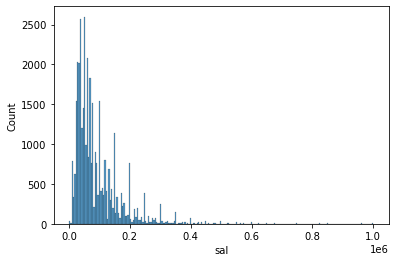

In [47]:
sns.histplot(sal_dec_df['sal'][sal_dec_df['sal']<=1_000_000])

In [49]:
print(sal_dec_df['sal'][sal_dec_df['sal']<=1_000_000].mean())
print(sal_dec_df['sal'][sal_dec_df['sal']<=1_000_000].median())


90989.23332334441
65000.0


In [50]:
log_sal = np.log10(sal_dec_df['sal'][sal_dec_df['sal']<=1_000_000])

<AxesSubplot:xlabel='sal', ylabel='Count'>

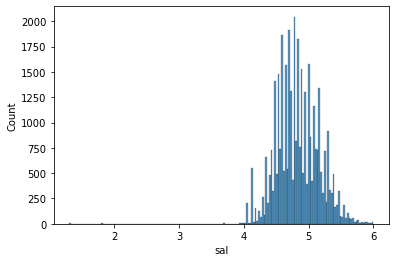

In [51]:
sns.histplot(log_sal)

In [52]:
print(log_sal.mean())

4.832980505359776


In [54]:
print(10**log_sal.mean())

68073.88009583388


In [81]:
def currency_converter(col):
    sal = 0
    for val in col:
        if val == 'RUR':
            sal = val*1
        elif val == 'USD':
            sal = val*56.2996
        elif val == 'EUR':
            sal = val*57.921
        else:
            sal = val*13.5040
    return sal

In [82]:
sal_cur_df = sal_dec_df['currency'].apply(currency_converter)

TypeError: 'float' object is not iterable